# Research Question

In [1]:
import pandas as pd
from scipy.cluster.vq import vq, kmeans, whiten
import matplotlib.pyplot as plt
import numpy as np

# Create 50 datapoints in two clusters a and b
pts = 50
a = np.random.multivariate_normal([0, 0], [[4, 1], [1, 4]], size=pts)
b = np.random.multivariate_normal([30, 10],
                               [[10, 2], [2, 1]],
                               size=pts)
features = np.concatenate((a, b))
# Whiten data
whitened = whiten(features)
# Find 2 clusters in the data
codebook, distortion = kmeans(whitened, 2)
# Plot whitened data and cluster centers in red
plt.scatter(whitened[:, 0], whitened[:, 1])
plt.scatter(codebook[:, 0], codebook[:, 1], c='r')
plt.show()


NameError: name 'np' is not defined

We are interested in clustering reddit subreddit using comment ad submission data to discern connections between subreddits and users. We are hoping to see similar userbases in subreddits we did not expect, or disconnects in userbases between subreddits that appear similar. We want to use a Clustering algorithm to connect subreddits in space, and calculate the distance between subreddits.

# Data Sources

All our data is coming from reddit. Reddit submission and comment data is publicly accessible, and reddit has a nice API structure. We are using the package PRAW (python reddit api wrapper), which makes the reddit api calls easier to use and python importable. We are attempting build subreddit comment vectors for a large number of reddit users. We would like to create nested dictionaries, the first level key being a reddit user, the second level keys being a subreddit name, and the values being how many time that specific user posted to a specific subreddit. The below script generates this dictionary for us. We can then convert this dictionary into a csv and a dataframe that panda can use.

In [1]:
import praw
import numpy as np
import pylab as plt
%matplotlib inline
from scipy.stats import ttest_ind
import praw
import pandas as pd

reddit = praw.Reddit(client_id='tc_fFbWZrkDSRw',
                     client_secret='fTq7nFVzdkCHFZY7jWQvHmkLpwk',
                     user_agent='lhimelman',
                    username = 'lhimelman',
                    password = 'madisonave77')

# assume you have a Reddit instance bound to variable `reddit`
#top_level_comments = list(submission.comments)
commentFreq = {}
subredditList = ["funny","AskReddit","todayilearned","science","worldnews","pics"]
headers = []
# for subredditname in subredditList:
#     print("subreddit started")
subreddit = reddit.subreddit('funny')
#this is limited to started from a single subreddit and only looking at the top post, in our code we look at many more posts
for submission in subreddit.hot(limit=1):
    all_comments = submission.comments.list()
    for c in all_comments:
        try:
            print(c.author.name, ":")
            userCFreq = {}
            #this code looks at one comment per user, our actual code looks at all the users comments.
            for comment in reddit.redditor(c.author.name).comments.new(limit=1):
                # print(comment.subreddit)
                if comment.subreddit not in userCFreq:
                    userCFreq[comment.subreddit] = 1
                else:
                    userCFreq[comment.subreddit] += 1
                if comment.subreddit not in headers:
                    headers.append(comment.subreddit)

            commentFreq[c.author.name] = userCFreq
        except:
            pass

df = pd.DataFrame.from_dict(data=commentFreq, orient='index').fillna(0)
df.to_csv('redditDatafake.csv',header=headers)

melon123456 :


# Data Cleaning

The data came to us pretty clean. Reddit's api allows us to filter deleted comments and the like. Our data cleaning plan is to make vectors out of the csv data that we can use for clustering later on. It is important that our vectors include zero for subreddits that a specific user did not comment on, and when our dataframe we took this into account
    
***Something we realized recently is that we need to filter porn. Didn't think that would be a big deal...but unfortunately it is.
    

In [3]:
import pandas as pd

df = pd.read_csv('data.csv',nrows=2000)
df

,Unnamed: 0,cocktails,AskReddit,videos,hearthstone,PUBATTLEGROUNDS,dontdeadopeninside,CompetitiveHS,funny,TWWPRDT,...,firefall,KUFIIOnline,atlantar4r,HeadBangToThis,Kochen,aachen,KnitRequest,petplay,Balls,peachfuzz
0,--abadox--,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,--arete--,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-COPBLOCK-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-Chakas-,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-DisobedientAvocado-,0.0,61.0,0.0,0.0,0.0,0.0,0.0,24.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-Enrique_Shockwave-,0.0,3.0,0.0,2.0,0.0,40.0,0.0,50.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-FuckYourGod,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-KyloRen,0.0,2.0,0.0,0.0,0.0,0.0,0.0,5.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-Mateo-,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,-Meik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Visualization

## Bar Graph

What are the most commented on subreddits from out sample?

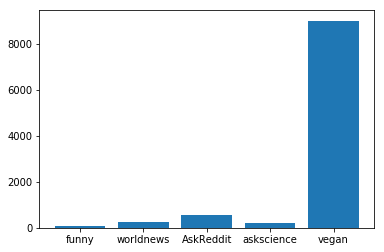

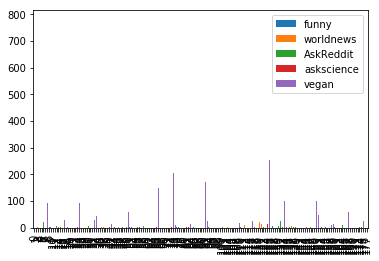

In [3]:
#from collections import Counter
    
new_data = pd.DataFrame(df, columns = ['funny', 'worldnews', 'AskReddit', 'askscience', 'vegan'])
#new_data

sums = {}
for c in new_data:
    sums[c] = new_data[c].sum()
sums

plt.bar(range(len(sums)), list(sums.values()), align = 'center')
plt.xticks(range(len(sums)), list(sums.keys()))

new_data.plot.bar()

## Scatter Plot

Number of subreddits commented on vs total number of posts for a user

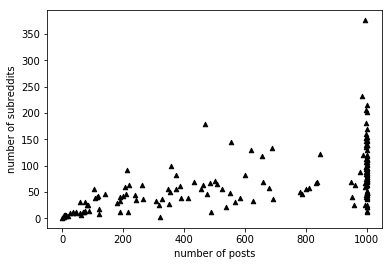

In [4]:
import scipy

df["total_posts"] = df.sum(axis=1)
df["total_posts"] = df["total_posts"].astype(int)


    
total_subreddits = []
for i in range(0, len(df.index)):
    subreddits = 0
    for j in range(1,len(df.columns)-1):
        if df.iat[i,j] != 0.0:
            subreddits += 1
    total_subreddits.append(subreddits)
  
df["total_subreddits"] = total_subreddits       
            

plt.scatter(df.total_posts,df.total_subreddits, color='k', s=20, marker="^")
plt.xlabel('number of posts')
plt.ylabel('number of subreddits')
plt.show()


## Line graph

Is reddit user posting a normal distribution?

In [4]:
df["total_posts"].plot(kind="density")
scipy.stats.normaltest(df["total_posts"])

KeyError: 'total_posts'

The number of posts reddit users make is not nearly a normal distribution. There are lots of people with almost no posts, and lots of users with tons of posts, and a large drop inbetween.There is no consistent distribution of how may posts a reddit user makes.